In [3]:
import numpy as np
from matplotlib.path import Path
from matplotlib import pyplot as plt
import pickle

import sys
sys.path.insert(0,'./src/')

from utils import *
from pipe import *
from pipe_system import PipeSystem
from abstract_pipe import *

In [4]:
with open('dev_Pipes.pickle','rb') as f:
    pipes, shifts = pickle.load(f)

In [5]:
bdr_pipe = BoundaryPipe([BoundaryLet(-10,0,0,2,1),BoundaryLet(36,0,np.pi,2,-1)])
real_pipes = [RealPipe(p,shift_x=shift[0],shift_y=shift[1]) for p,shift in zip(pipes,shifts)]
ps = PipeSystem(real_pipes,bdr_pipe)

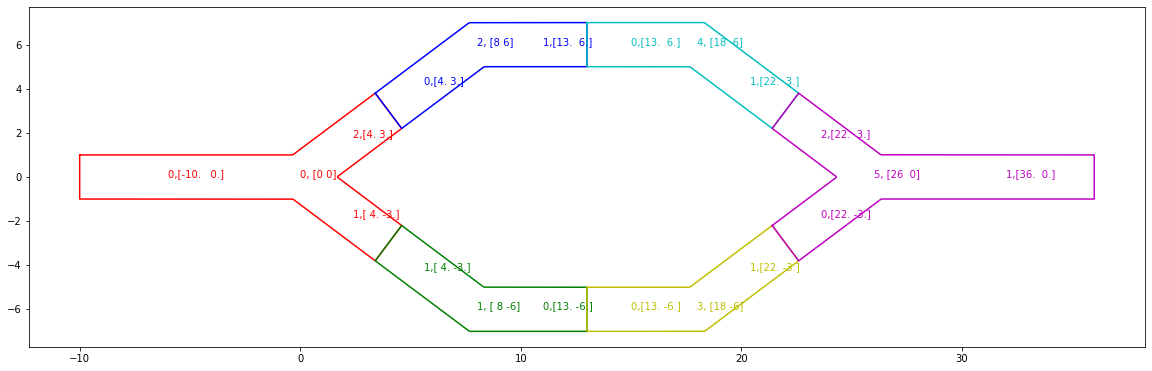

In [6]:

color = ['r','g','b','y','c','m','k']

fig,ax = plt.subplots(figsize=(20,10))
ax.set_aspect('equal')

for a,i,j,c in zip(range(10),pipes,shifts,color):
    ax.plot(*(i.closed_boundary + j).T,c=c)
    for k,let in enumerate(i.lets):
        ax.text(*(0.6*let.matching_pt + j),f'{k},{let.matching_pt + j}',color=c)
    ax.text(*j,f'{a}, {j}',color=c)

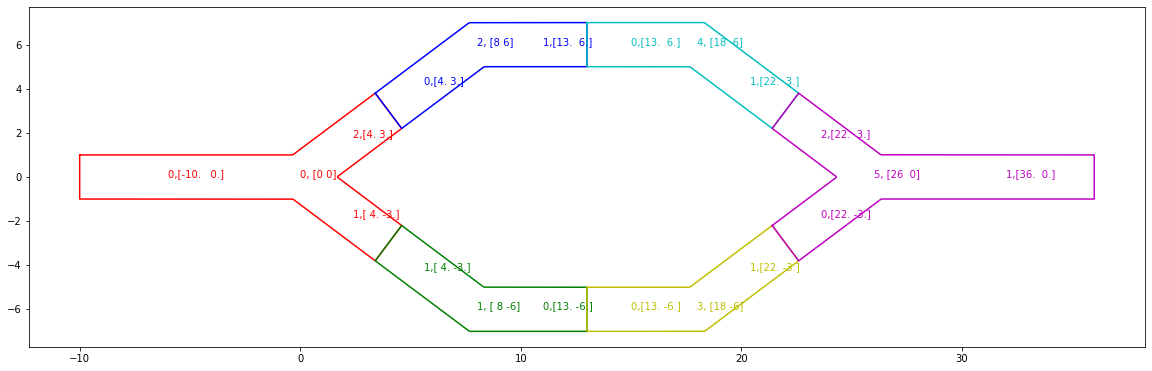

In [14]:
color = ['r','g','b','y','c','m','k']

fig,ax = plt.subplots(figsize=(20,10))
ax.set_aspect('equal')

for a,i,j,c in zip(range(10),pipes,shifts,color):
    ax.plot(*(i.closed_boundary + j).T,c=c)
    for k,let in enumerate(i.lets):
        ax.text(*(0.6*let.matching_pt + j),f'{k},{let.matching_pt + j}',color=c)
    ax.text(*j,f'{a}, {j}',color=c)



In [26]:
u_field = []
xs = []
ys = []

for pipe_index, (pipe,shift) in enumerate(zip(pipes,shifts)):
    
    field = np.zeros_like(pipe.xs)
    
    for flow_index in range(pipe.n_flows):
        field += pipe.u_fields[flow_index] * ps.fluxes[ps.flow2index[(pipe_index,flow_index)]]
    
    u_field.append(field)
    xs.append(pipe.xs + shift[0])
    ys.append(pipe.ys + shift[1])
    
xs = np.concatenate(xs)
ys = np.concatenate(ys)
u_field = np.concatenate(u_field)


Text(0.5, 0.98, 'color=u')

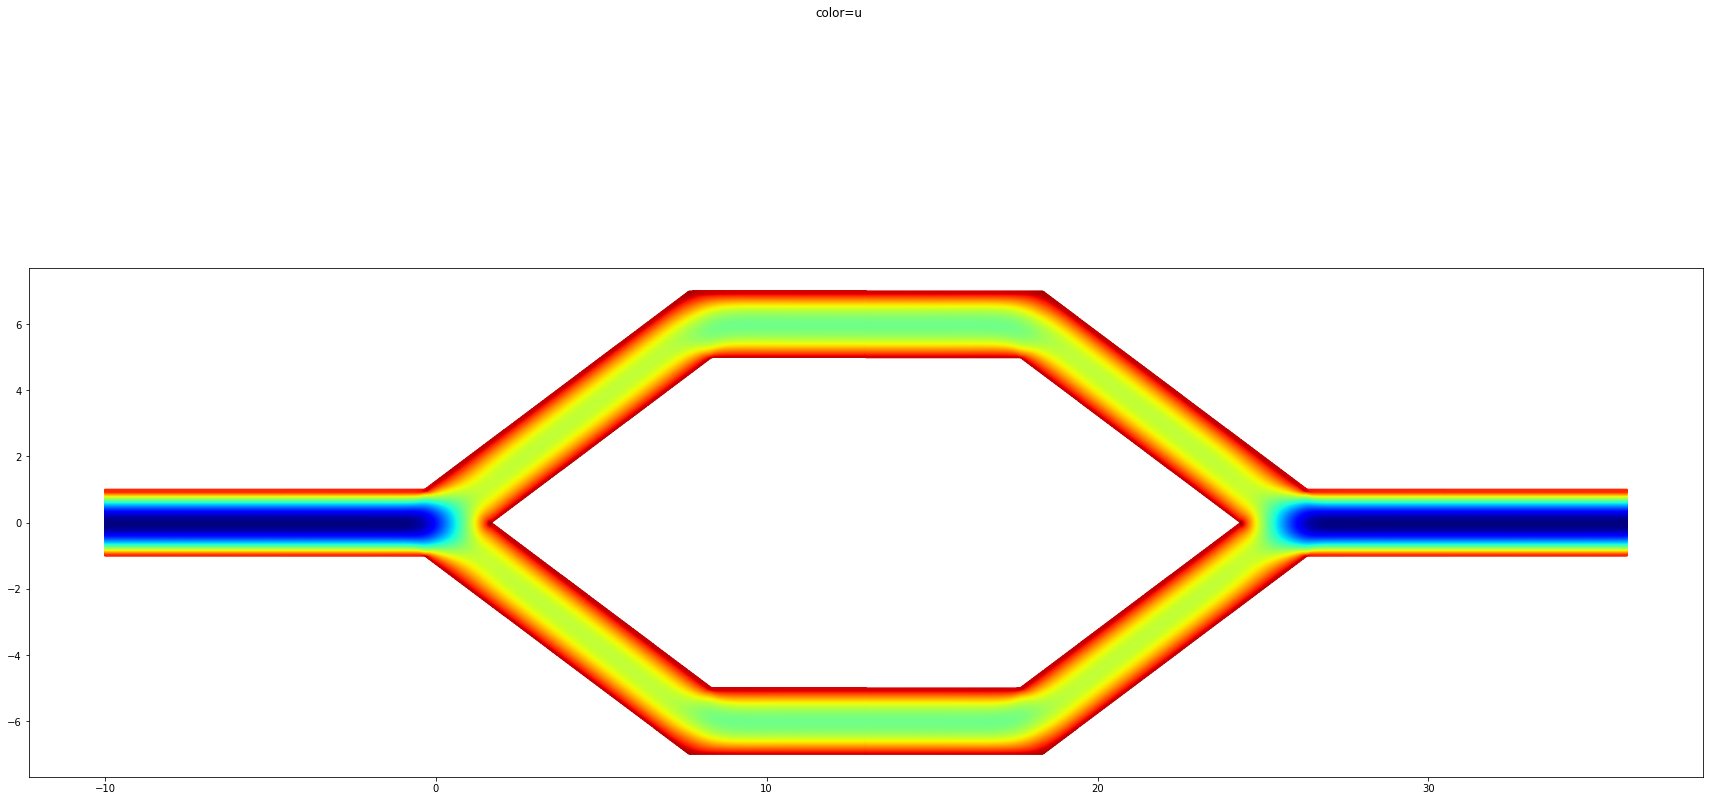

In [33]:
fig,ax = plt.subplots(figsize=(30,15))
ax.set_aspect('equal')
ax.scatter(xs,ys,c=u_field,cmap='jet',s=1)
fig.suptitle('color=u')

In [28]:
v_field = []
xs = []
ys = []

for pipe_index, (pipe,shift) in enumerate(zip(pipes,shifts)):
    
    field = np.zeros_like(pipe.xs)
    
    for flow_index in range(pipe.n_flows):
        field += pipe.v_fields[flow_index] * ps.fluxes[ps.flow2index[(pipe_index,flow_index)]]
    
    v_field.append(field)
    xs.append(pipe.xs + shift[0])
    ys.append(pipe.ys + shift[1])
    
xs = np.concatenate(xs)
ys = np.concatenate(ys)
v_field = np.concatenate(v_field)


Text(0.5, 0.98, 'color=v')

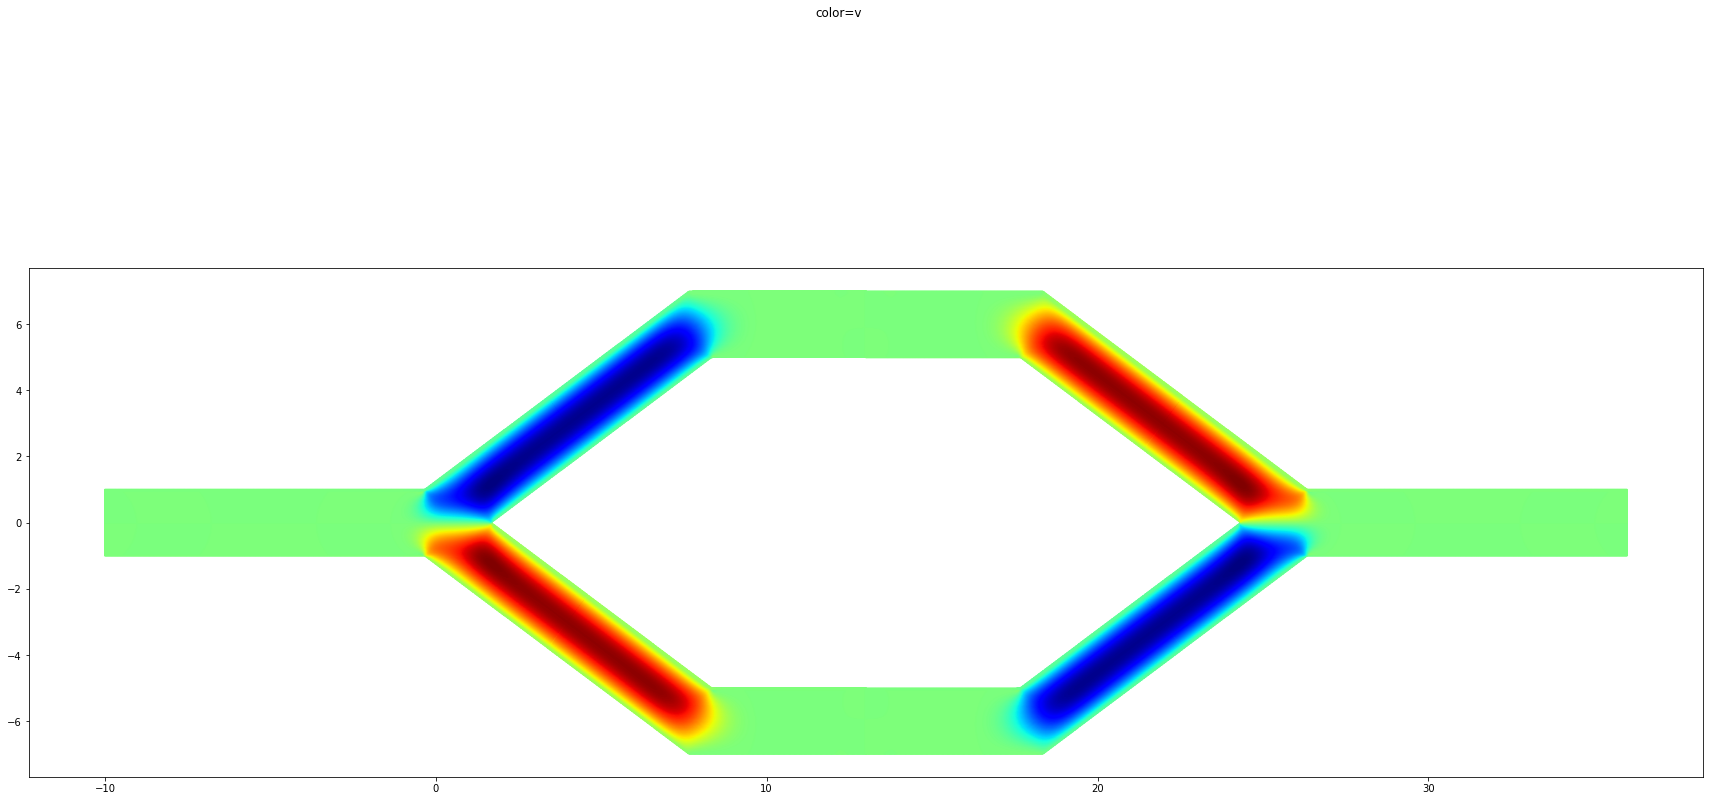

In [32]:
fig,ax = plt.subplots(figsize=(30,15))
ax.set_aspect('equal')
ax.scatter(xs,ys,c=v_field,cmap='jet',s=1)
fig.suptitle('color=v')

Text(0.5, 0.98, 'color=speed')

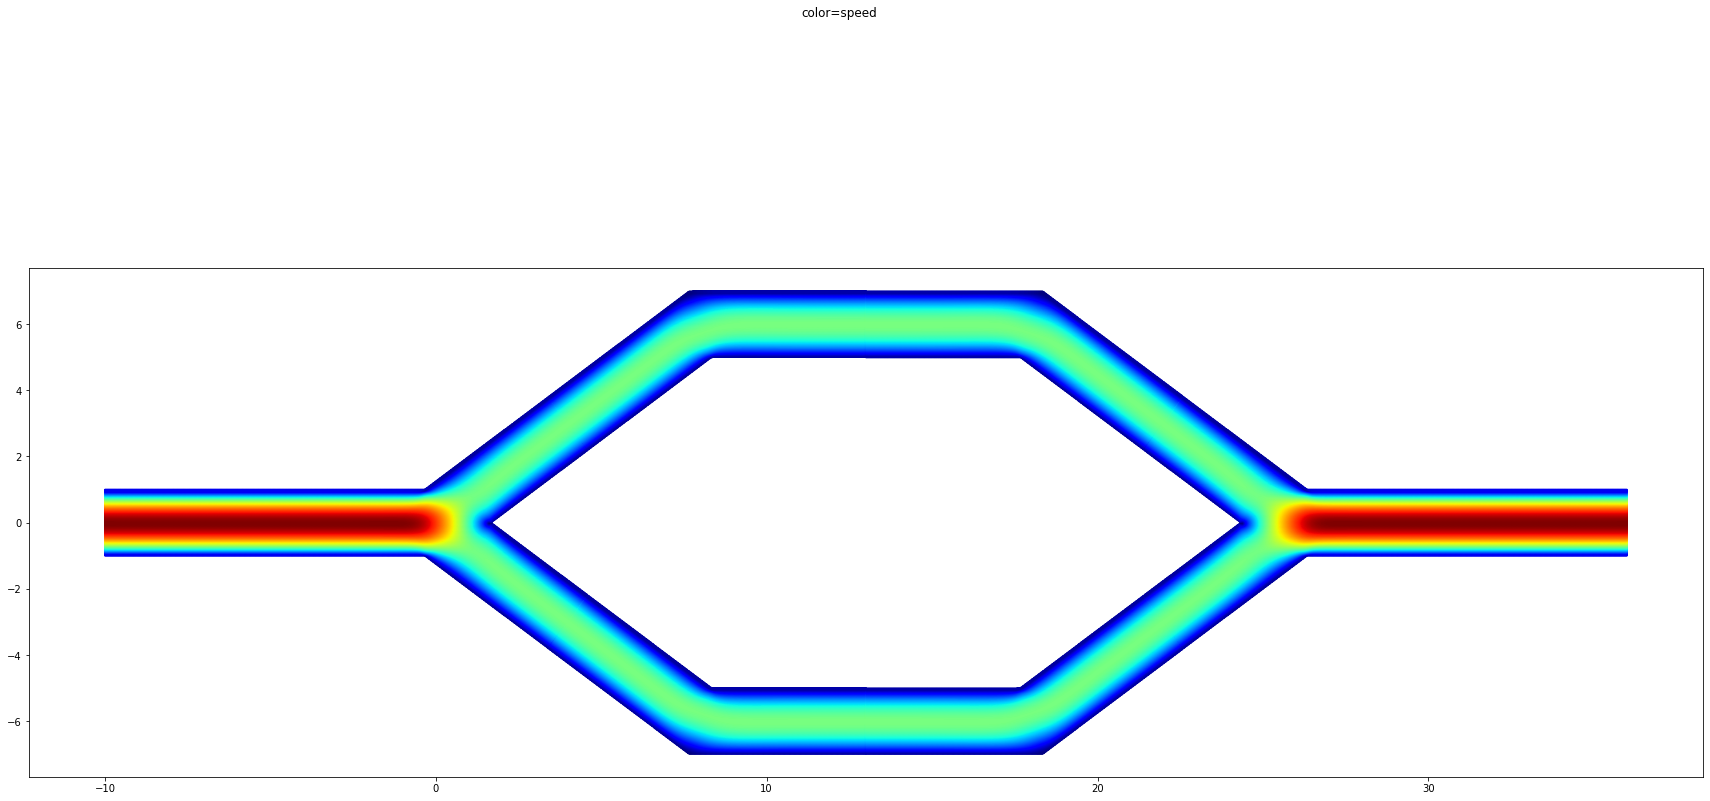

In [31]:
fig,ax = plt.subplots(figsize=(30,15))
ax.set_aspect('equal')
ax.scatter(xs,ys,c=np.sqrt(v_field**2 + u_field**2),cmap='jet',s=1)
fig.suptitle('color=speed')

In [37]:
vorticity_field = []
xs = []
ys = []

for pipe_index, (pipe,shift) in enumerate(zip(pipes,shifts)):
    
    field = np.zeros_like(pipe.xs)
    
    for flow_index in range(pipe.n_flows):
        field += pipe.vorticity_fields[flow_index] * ps.fluxes[ps.flow2index[(pipe_index,flow_index)]]
    
    vorticity_field.append(field)
    xs.append(pipe.xs + shift[0])
    ys.append(pipe.ys + shift[1])
    
xs = np.concatenate(xs)
ys = np.concatenate(ys)
vorticity_field = np.concatenate(vorticity_field)


Text(0.5, 0.98, 'color=vorticity')

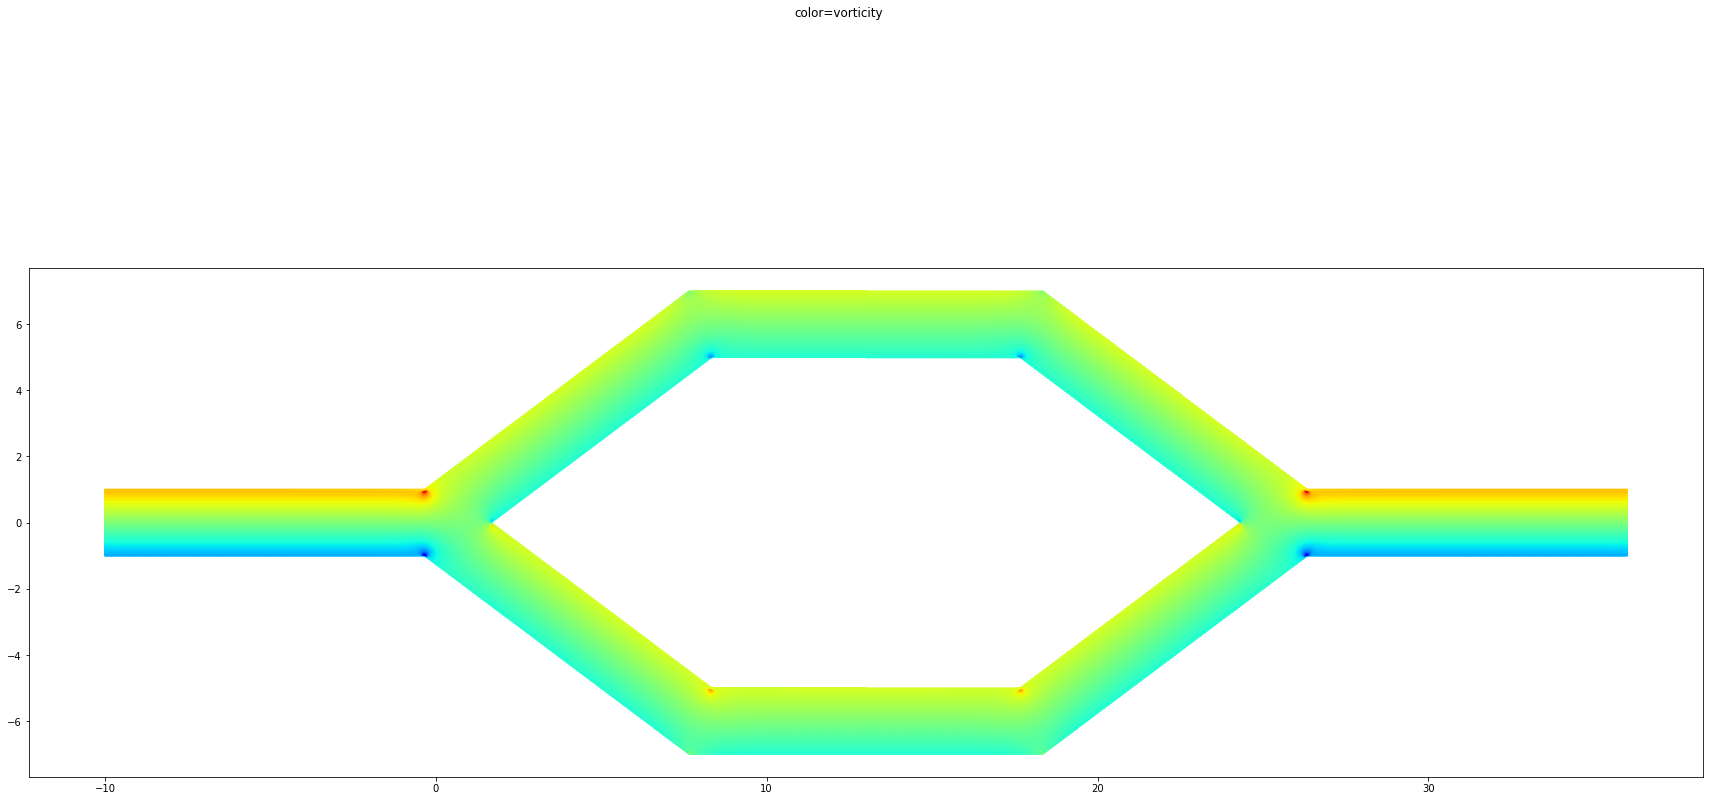

In [ ]:
fig,ax = plt.subplots(figsize=(30,15))
ax.set_aspect('equal')
ax.scatter(xs,ys,c=pressure_field,cmap='jet',s=1)
fig.suptitle('color=vorticity')

In [39]:
pressure_field = []
xs = []
ys = []

for pipe_index, (pipe,shift) in enumerate(zip(pipes,shifts)):
    
    field = np.zeros_like(pipe.xs)
    
    for flow_index in range(pipe.n_flows):
        field += pipe.pressure_fields[flow_index] * ps.fluxes[ps.flow2index[(pipe_index,flow_index)]]
    
    pressure_field.append(field)
    xs.append(pipe.xs + shift[0])
    ys.append(pipe.ys + shift[1])
    
xs = np.concatenate(xs)
ys = np.concatenate(ys)
pressure_field = np.concatenate(pressure_field)


Text(0.5, 0.98, 'color=pressure')

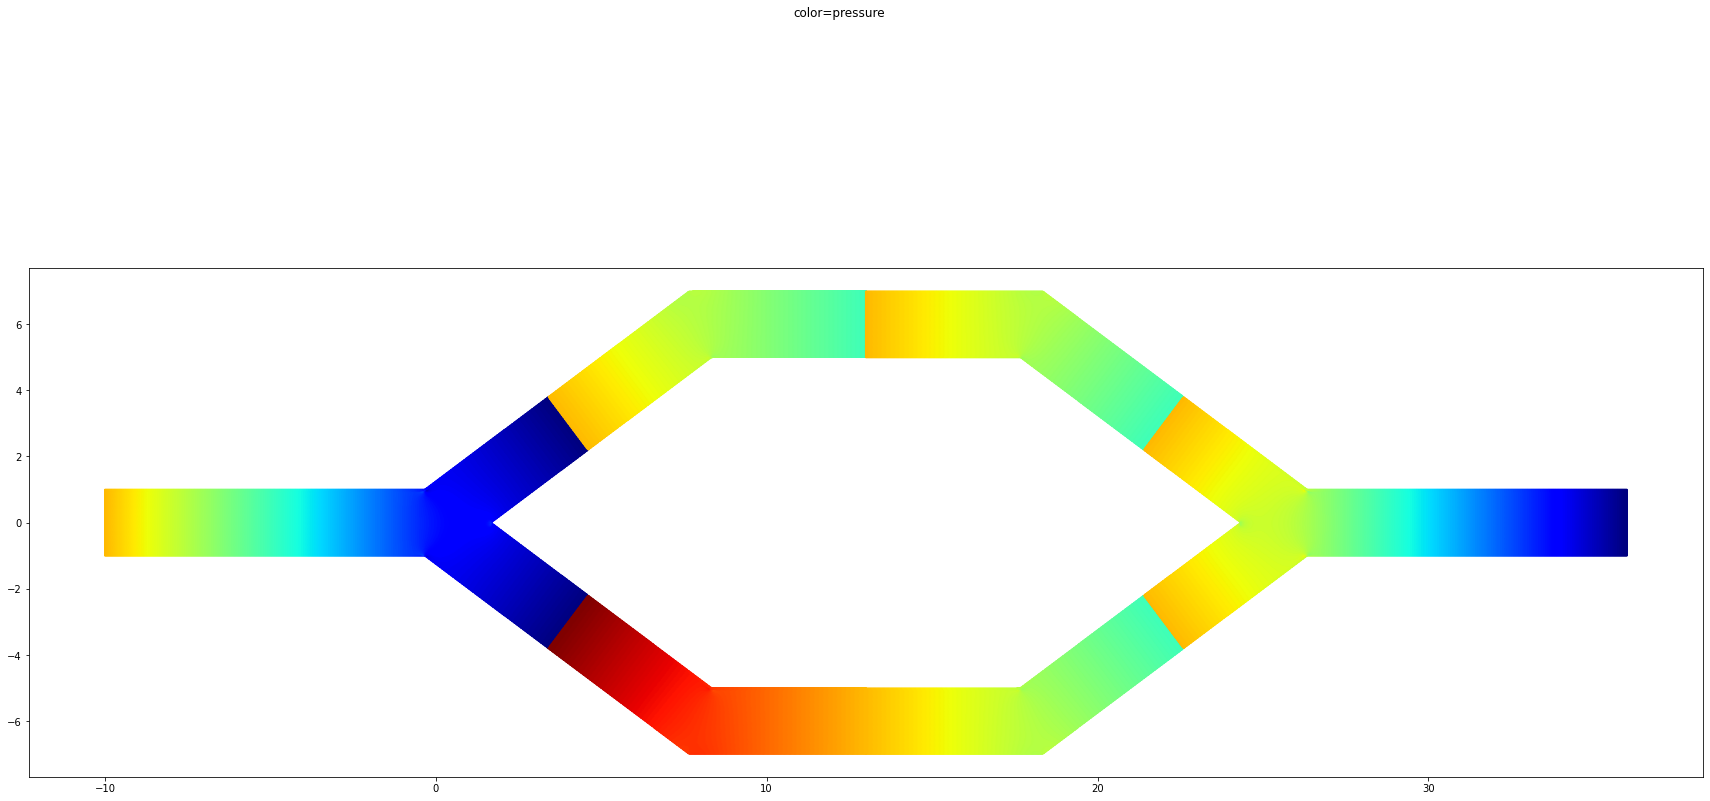

In [41]:
fig,ax = plt.subplots(figsize=(30,15))
ax.set_aspect('equal')
ax.scatter(xs,ys,c=pressure_field,cmap='jet',s=1)
fig.suptitle('color=pressure')

- [ ] deducting the pressure field